# Fourierov red

## Teorem o konvergenciji 

Neka je $f$ po djelovima glatka periodična funkcija s periodom $T=x_1-x_0$ koja na intervalu $[x_0,x_1]$ zadovoljava __Dirichletove uvjete:__

* $f$ je po djelovima neprekidna i njezini prekidi su prve vrste
* $f$ je ili monotona ili ima konačno strogih ekstrema 

Tada Fourierov red
$$
S(x)=\frac{a_0}{2}+\sum_{n=1}^\infty a_n \cos \frac{2 n \pi}{T}x + b_n \sin \frac{2 n \pi}{T}x,
$$
gdje je
$$
a_0=\frac{2}{T} \int_{x_0}^{x_1} f(x) \, dx, \\
a_n=\frac{2}{T} \int_{x_0}^{x_1} f(x) \cos \frac{2 n \pi}{T}x \,dx,\\
b_n=\frac{2}{T} \int_{x_0}^{x_1} f(x) \sin \frac{2 n \pi}{T}x \,dx,
$$
konvergira u svakoj točki $x\in [x_0,x_1]$ i vrijedi 
$$
S(x)=\begin{cases}
     f(x), \textrm{ ako je } f \textrm{ neprekinuta u točki } x,\\
     \frac{1}{2} [f(x-0)+f(x+0)], \textrm{ inače.}
     \end{cases}
     $$

## Simboličko računanje 
`SymPy` je paket za simboličko računanje preuzet iz `Python`-a, `Interact` je paket za jednostavno manipuliranje parametrima, a `Winston` je jedan od paketa za crtanje.

In [1]:
using SymPy
using Interact
using Winston

Definirajmo simboličku varijablu $x$, simboličku cjelobrojnu (integer) varijablu $n$, i granice intervala $x_0$ i $x_1$. 

In [2]:
x=Sym("x")
n=symbols("n",integer=true)
x_0=Sym("x_0")
x_1=Sym("x_1")
T=Sym("T")

T

### Definiranje koeficijenata

In [3]:
a(n)=2*integrate(f(x)*cos(2*PI*n*x/T),(x,x_0,x_1))/T
b(n)=2*integrate(f(x)*sin(2*PI*n*x/T),(x,x_0,x_1))/T

b (generic function with 1 method)

### Zadavanje funkcije $f(x)$ i granica intervala $[x_0,x_1]$

Potrebno je koristiti predefiniranu simboličku varijablu `PI` za razliku od varijabli `pi` ili $\pi$
kojima je definirana `Float64` vrijednost.

In [4]:
f(x)=x
x_0=-PI
x_1=PI
T=x_1-x_0

2⋅π

In [5]:
a(1)

0

In [6]:
[a(n) for n=0:5]

6-element Array{SymPy.Sym,1}
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [7]:
[b(n) for n=0:5]

6-element Array{SymPy.Sym,1}
⎡ 0  ⎤
⎢    ⎥
⎢ 2  ⎥
⎢    ⎥
⎢ -1 ⎥
⎢    ⎥
⎢2/3 ⎥
⎢    ⎥
⎢-1/2⎥
⎢    ⎥
⎣2/5 ⎦

### Računanje i crtanje sume
Trebaju nam i numeričke granice.

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(5, nactions=1),"K",5,"5",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)),Any[],Any[],true,"horizontal")

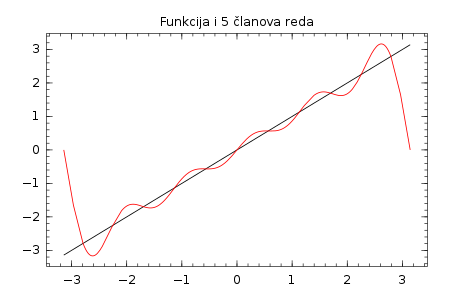

In [8]:
x0=N(x_0)
x1=N(x_1)
@manipulate for K=1:10
    S=a(0)/2+sum([a(n)*cos(2*PI*n*x/T)+b(n)*sin(2*PI*n*x/T) for n=1:K])
    g(x)=S(x)
    plot(f,x0,x1)
    oplot(g,x0,x1,"r")
    title("Funkcija i "*string(K)*" članova reda")
end

## Korištenje funkcije `fourier_series()`

Prvo pogledajmo simboličko računanje razvoja u Taylor-ov red.

In [9]:
G1=series(sin(x),x,0,7)

     3     5        
    x     x     ⎛ 7⎞
x - ── + ─── + O⎝x ⎠
    6    120        

In [10]:
fieldnames(G1)

1-element Array{Symbol,1}:
 :x

In [11]:
G2=series(cos(x),x,0,7)


(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


     2    4     6        
    x    x     x     ⎛ 7⎞
1 - ── + ── - ─── + O⎝x ⎠
    2    24   720        

In [12]:
G3=simplify(G1*G2)

       3      5        
    2⋅x    2⋅x     ⎛ 7⎞
x - ──── + ──── + O⎝x ⎠
     3      15         

In [13]:
removeO(G3)

   5      3    
2⋅x    2⋅x     
──── - ──── + x
 15     3      

Sada razvoj u Fourier-ov red

In [31]:
c=fourier_series(x^2,(x,x_0,x_1))

                        2    
                       π     
-4⋅cos(x) + cos(2⋅x) + ── + …
                       3     

In [32]:
c1=truncate(c,10)

                                                                              
                       4⋅cos(3⋅x)   cos(4⋅x)   4⋅cos(5⋅x)   cos(6⋅x)   4⋅cos(7
-4⋅cos(x) + cos(2⋅x) - ────────── + ──────── - ────────── + ──────── - ───────
                           9           4           25          9           49 

                               2
⋅x)   cos(8⋅x)   4⋅cos(9⋅x)   π 
─── + ──────── - ────────── + ──
         16          81       3 

In [33]:
N(c1(1))

1.0247547650708126

### Računanje aproksimacije i crtanje

In [35]:
X = linspace(x0,x1)
css=[N(c1(x)) for x in X]

50-element Array{Float64,1}:
 9.44894
 9.16544
 8.44804
 7.59106
 6.83312
 6.22292
 5.66699
 5.07892
 4.47014
 3.91158
 ⋮      
 4.47014
 5.07892
 5.66699
 6.22292
 6.83312
 7.59106
 8.44804
 9.16544
 9.44894

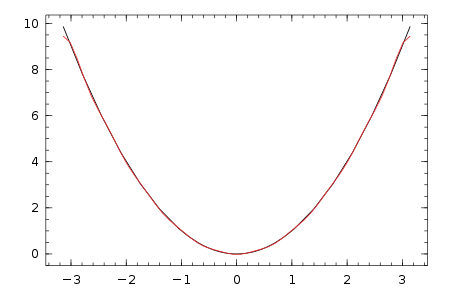

In [36]:
plot(x->x^2,x0,x1,X,css)

### Interaktivno računanje i crtanje

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(10, nactions=1),"K",10,"10",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(18=>"18",2=>"2",16=>"16",11=>"11",7=>"7",9=>"9",10=>"10",19=>"19",17=>"17",8=>"8"…)),Any[],Any[],true,"horizontal")


(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


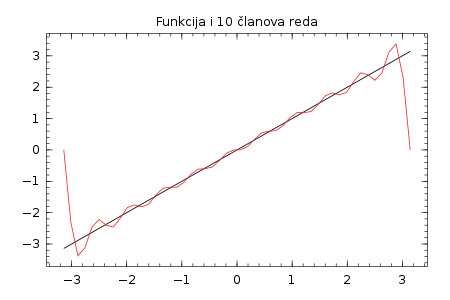

In [48]:
f1=x
@manipulate for K=1:20
    cs=truncate(fourier_series(f1,(x,x_0,x_1)),K)
    css=[N(cs(x)) for x in X]
    plot(f,x0,x1,X,css)
    title("Funkcija i "*string(K)*" članova reda")
end

## Numerička integracija
Fourierove koeficijente čemo izračunati _numeričkom integracijom_ (vidi [Numeričko integriranje](http://www.fesb.hr/mat2/)) koristeći Julia naredbu [quadgk](http://docs.julialang.org/en/latest/stdlib/math/?highlight=quadgk#Base.quadgk).

Ovaj dio je izrađen prema bilježnici [lecture-2.ipynb](http://nbviewer.ipython.org/url/math.mit.edu/~stevenj/18.303/lecture-2.ipynb) [Stevena Johnsona](http://math.mit.edu/~stevenj/) izrađenoj za predmet [18.303](http://math.mit.edu/~stevenj/18.303/).

Definirajmo funkcije `sinecoef` i `coscoef` koje numerički računaju koeficijente. Parametar `abstol` je toleranca numeričke integracije: želimo da je greška mala u odnosu na $\sqrt{\int_{x_0}^{x_1} |f(x)|^2 dx}$.

In [49]:
Tf=N(T)
sinecoef(f, m, x0, x1, Tf) = 2 * quadgk(x -> f(x) * sin(2*m*π*x/Tf)/Tf, x0,x1, abstol=1e-8 * sqrt(quadgk(x->abs2(f(x)),x0,x1)[1]))[1]
coscoef(f, m, x0, x1, Tf) = 2 * quadgk(x -> f(x) * cos(2*m*π*x/Tf)/Tf, x0,x1, abstol=1e-8 * sqrt(quadgk(x->abs2(f(x)),x0,x1)[1]))[1]

# i druga funkcija koja računa na vektoru prirodnih brojeva
sinecoef(f, M::AbstractVector,x0,x1,Tf) = Float64[sinecoef(f,m,x0,x1,Tf) for m in M]
coscoef(f, M::AbstractVector,x0,x1,Tf) = Float64[coscoef(f,m,x0,x1,Tf) for m in M]

coscoef (generic function with 2 methods)

In [50]:
# First, define a function to evaluate N terms of the sine series, given the coefficients b
function fouriersum(a, b, x, T)
    f = a[1]/2
    for n = 1:length(b)
        f += a[n+1]* cos(2*n*π*x/T) + b[n] * sin(2*n*π*x/T)
    end
    return f
end
fouriersum(a, b, X::AbstractVector, T) = Float64[fouriersum(a, b,x,T) for x in X]

fouriersum (generic function with 2 methods)

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(49, nactions=1),"n",49,"49",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"3"=>3,"5"=>5,"7"=>7,"9"=>9,"11"=>11,"13"=>13,"15"=>15,"17"=>17,"19"=>19…),Dict(89=>"89",11=>"11",39=>"39",85=>"85",25=>"25",55=>"55",29=>"29",59=>"59",95=>"95",57=>"57"…)),Any[],Any[],true,"horizontal")


(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


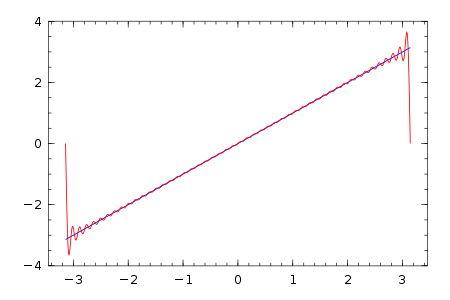


(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:10912): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

In [51]:
# Uzmimo više točaka (inače "nestane" Gibbsov efekt!!)
X=linspace(x0,x1,1000)
@manipulate for n=1:2:99
    a = coscoef(f, 0:n, x0, x1, Tf)
    b = sinecoef(f, 1:n, x0, x1, Tf)
    plot(f,x0,x1,"b",X, fouriersum(a, b, X, Tf), "r-")
    # xlabel(L"$x$")
    # legend(["exact f", "$n-term sine series"])
    # title("Funkcija i "*string(N)*" članova reda")
end

## Primjeri

In [100]:
f(x)=x^2
x_0=-1
x_1=1
T=x_1-x_0

2

In [101]:
a(3)

0

In [103]:
f(x)

 2
x 

In [104]:
a(n)

⎧  2/3    for n = 0
⎪                  
⎪      n           
⎨4⋅(-1)            
⎪───────  otherwise
⎪  2  2            
⎩ π ⋅n             

In [105]:
b(2)

0

In [106]:
b(n)=2*integrate(f(x)*sin(2*PI*n*x/T),(x,x_0,x_1))/T

b (generic function with 1 method)

In [107]:
x

x

In [113]:
f(2)

4

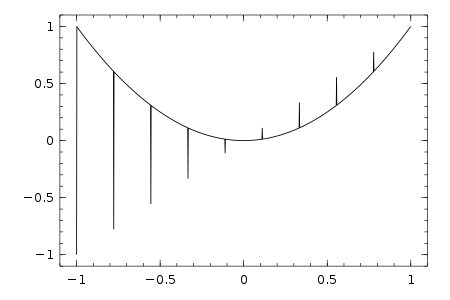

In [114]:
plot(f,x_0,x_1)

In [99]:
x0=N(x_0)
x1=N(x_1)
@manipulate for N=1:10
    S=sum([a(n)*cos(2*PI*n*x/T)+b(n)*sin(2*PI*n*x/T) for n=0:N])
    g(x)=S(x)
    plot(f0,x0,x1)
    oplot(g,x0,x1,"r")
    title("Funkcija i "*string(N)*" članova reda")
end

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(5, nactions=1),"N",5,"5",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)),Any[],Any[],true,"horizontal")

LoadError: PyError (:PyObject_Call) <class 'TypeError'>
TypeError("'Zero' object is not callable",)


In [35]:
@manipulate for N=1:20
    return cs=sympy.mpmath[:fourier](f,[x0,x1],N)
    css=Float64[sympy.mpmath[:fourierval](cs,[x0,x1],x) for x in X]
    plot(f,x0,x1,X,css)
    title("Funkcija i "*string(N)*" članova reda")
end

Slider{Int64}([Input{Int64}] 10,"N",10,1:20)

LoadError: PyError (:PyObject_Call) <type 'exceptions.RuntimeError'>
RuntimeError("Julia exception: MethodError(*,(PyObject mpf('-0.6'),PyObject mpf('-0.6')))",)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/approximation.py", line 218, in fourier
    an = 2*ctx.quadgl(lambda t: f(t)*ctx.cos(m*t), interval)/L
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 810, in quadgl
    return ctx.quad(*args, **kwargs)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 743, in quad
    v, err = rule.summation(f, points[0], prec, epsilon, m, verbose)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 232, in summation
    results.append(self.sum_next(f, nodes, degree, prec, results, verbose))
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 254, in sum_next
    return self.ctx.fdot((w, f(x)) for (x,w) in nodes)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/ctx_mp_python.py", line 925, in fdot
    for a, b in A:
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 254, in <genexpr>
    return self.ctx.fdot((w, f(x)) for (x,w) in nodes)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/approximation.py", line 218, in <lambda>
    an = 2*ctx.quadgl(lambda t: f(t)*ctx.cos(m*t), interval)/L

while loading In[35], in expression starting on line 1

In [37]:
f(x)

 2
x 

In [38]:
f

f (generic function with 1 method)

In [40]:
f(2)

4

In [41]:
cs=sympy.mpmath[:fourier](f,[x0,x1],1)

LoadError: PyError (:PyObject_Call) <type 'exceptions.RuntimeError'>
RuntimeError("Julia exception: MethodError(*,(PyObject mpf('-0.6'),PyObject mpf('-0.6')))",)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/approximation.py", line 218, in fourier
    an = 2*ctx.quadgl(lambda t: f(t)*ctx.cos(m*t), interval)/L
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 810, in quadgl
    return ctx.quad(*args, **kwargs)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 743, in quad
    v, err = rule.summation(f, points[0], prec, epsilon, m, verbose)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 232, in summation
    results.append(self.sum_next(f, nodes, degree, prec, results, verbose))
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 254, in sum_next
    return self.ctx.fdot((w, f(x)) for (x,w) in nodes)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/ctx_mp_python.py", line 925, in fdot
    for a, b in A:
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/quadrature.py", line 254, in <genexpr>
    return self.ctx.fdot((w, f(x)) for (x,w) in nodes)
  File "/usr/lib/python2.7/site-packages/sympy/mpmath/calculus/approximation.py", line 218, in <lambda>
    an = 2*ctx.quadgl(lambda t: f(t)*ctx.cos(m*t), interval)/L

while loading In[41], in expression starting on line 1

In [43]:
x0

-1.0

In [44]:
x1

1.0

In [42]:
f(x)=0 : x<0, 1

f (generic function with 1 method)

In [47]:
methods(sympy.Piecewise)

# 1 method for generic function "fn":
fn(args...) at /home/slap/.julia/v0.3/PyCall/src/conversions.jl:188

In [51]:
f(x)=sympy.Piecewise((0,x<=0),(x,x>0))

f (generic function with 1 method)

In [53]:
f(-1)

0

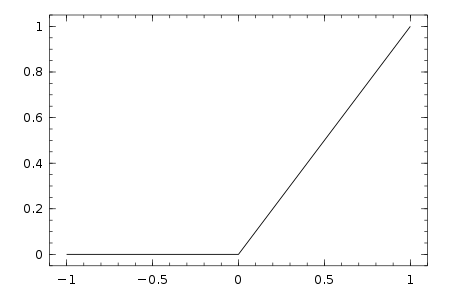

In [54]:
plot(f,-1,1)